<a href="https://colab.research.google.com/github/CorkyCroc/Vinuni/blob/main/Final_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import file


In [ ]:
# import csv file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
df = pd.read_csv('/content/Final DS - Final draft.csv')

In [ ]:
df

,title,channel_title,subscriber_count,duration_minutes,released_year,views,language,region,likes,comments,has_subtitles
0,lofi hip hop radio 📚 beats to relax/study to,Lofi Girl,14900000,0.00,2022,543390142,en-US,FR,3227137,0,False
1,Chill Lofi Beats Mix [chill lo-fi hip hop beat...,Art Is Sound,12500,102.92,2024,2459613,en-US,US,15513,424,False
2,90's Lofi City 🔥Retro Tokyo Lofi 🌃 Lo fi Beats...,Chillhop Street Beats,26800,90.82,2024,4093102,en,US,36930,1460,True
3,𝙻𝚘𝚏𝚒 𝚁𝚘𝚘𝚖 / 𝙶𝚞𝚒𝚝𝚊𝚛 𝙻𝚘𝚏𝚒 / 𝙲𝚊𝚏𝚎 𝙼𝚞𝚜𝚒𝚌 / 𝙴𝚊𝚜𝚢 𝚕𝚒...,Myour Music,39800,182.48,2024,4176732,en,US,31549,344,False
4,90's Chill Lofi ☕️ Study Music Lofi Rain Chill...,The Japanese Town,50400,713.75,2024,9689587,en,US,78930,2972,False
...,...,...,...,...,...,...,...,...,...,...,...
95,🥵Yamakaathaghi - Review⁉️ #shorts #review #dhi...,Dhiwesh Vlogs,19700,0.70,2025,130835,hindi,IN,4703,84,False
96,Sinners - Movie Review,Mike’s Movie Reviews,1730,0.75,2025,13703,en,US,301,13,True
97,Shin Chan: Our Dinosaur Diary Movie Review | Y...,YOGI BOLTA HAI,1310000,2.15,2025,245016,zxx,IN,11353,345,True
98,Raid 2 Movie REVIEW | Deeksha Sharma,Filmi Indian,4590000,5.17,2025,635937,hindi,IN,15658,1554,True


### Clean Data

In [ ]:
# Duplicate values
print(f"Duplicated values: {df.duplicated().sum()}")
# Missing values
print(f"Missing values: {df.isna().sum().sum()}")

Duplicated values: 0
Missing values: 0


In [ ]:
# Remove all the 0 second videos
df['duration_minutes'] = df['duration_minutes'].apply(lambda x: np.nan if x == 0 else x)
df.dropna(subset=['duration_minutes'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
# Combine all language that contain "en"
df['language'] = df['language'].apply(lambda x: 'English' if 'en' in x.lower() else x)
# Combine hindi, IN, te, tegulu, tamil, hi, ta language to Indian
unique_val = df['language'].unique()
for val in unique_val:
  if 'hindi' in val.lower() or 'IN' in val or 'te' in val.lower() or 'tegulu' in val.lower() or 'tamil' in val.lower() or 'hi' in val.lower() or 'ta' in val:
    df['language'] = df['language'].apply(lambda x: 'Indian' if x == val else x)
# Combine all other language that less than count less than 5 to 'Others'
df['language'] = df['language'].apply(lambda x: 'Others' if df['language'].value_counts()[x] < 5 else x)
df['language'].value_counts()

,count
language,
English,49
unknown,23
Indian,21
Others,5


In [ ]:
en_lang = df[df['language'] == 'English']
en_lang["has_subtitles"].value_counts()

,count
has_subtitles,
True,33
False,16


In [ ]:
df

,title,channel_title,subscriber_count,duration_minutes,released_year,views,language,region,likes,comments,has_subtitles
0,Chill Lofi Beats Mix [chill lo-fi hip hop beat...,Art Is Sound,12500,102.92,2024,2459613,English,US,15513,424,False
1,90's Lofi City 🔥Retro Tokyo Lofi 🌃 Lo fi Beats...,Chillhop Street Beats,26800,90.82,2024,4093102,English,US,36930,1460,True
2,𝙻𝚘𝚏𝚒 𝚁𝚘𝚘𝚖 / 𝙶𝚞𝚒𝚝𝚊𝚛 𝙻𝚘𝚏𝚒 / 𝙲𝚊𝚏𝚎 𝙼𝚞𝚜𝚒𝚌 / 𝙴𝚊𝚜𝚢 𝚕𝚒...,Myour Music,39800,182.48,2024,4176732,English,US,31549,344,False
3,90's Chill Lofi ☕️ Study Music Lofi Rain Chill...,The Japanese Town,50400,713.75,2024,9689587,English,US,78930,2972,False
4,Make you feel positive and peaceful 🍀 Lofi Cof...,Lofi Coffee,66800,1478.63,2024,6785571,unknown,US,47591,1673,True
...,...,...,...,...,...,...,...,...,...,...,...
93,🥵Yamakaathaghi - Review⁉️ #shorts #review #dhi...,Dhiwesh Vlogs,19700,0.70,2025,130835,hindi,IN,4703,84,False
94,Sinners - Movie Review,Mike’s Movie Reviews,1730,0.75,2025,13703,English,US,301,13,True
95,Shin Chan: Our Dinosaur Diary Movie Review | Y...,YOGI BOLTA HAI,1310000,2.15,2025,245016,Others,IN,11353,345,True
96,Raid 2 Movie REVIEW | Deeksha Sharma,Filmi Indian,4590000,5.17,2025,635937,hindi,IN,15658,1554,True


### Logistic Model


### SVM

### Visualize Data

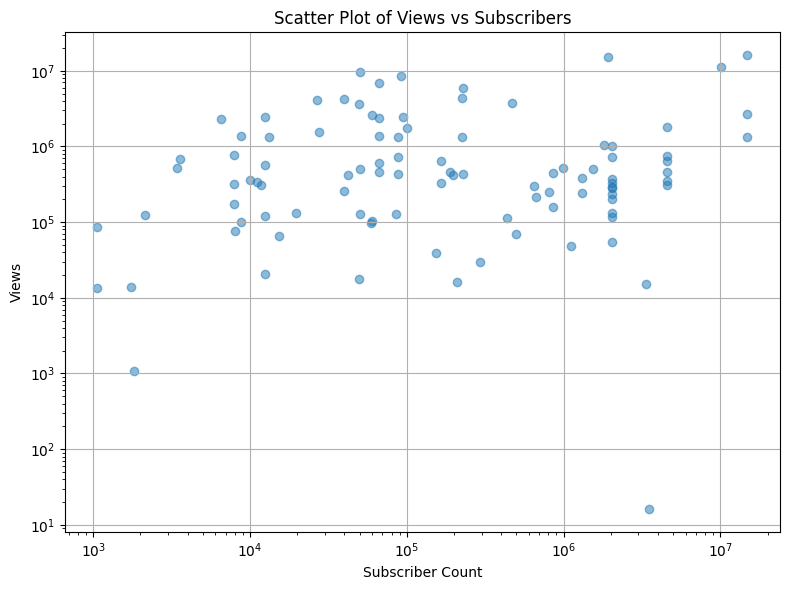

In [ ]:
x_col = 'subscriber_count'
y_col = 'views'

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[x_col], df[y_col], alpha=0.5)

# (Optional) If the distributions span many orders of magnitude:
plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.grid(True)
plt.xlabel('Subscriber Count')
plt.ylabel('Views')
plt.title('Scatter Plot of Views vs Subscribers')

plt.tight_layout()
plt.show()


<ipython-input-29-80fc8ff5db32>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


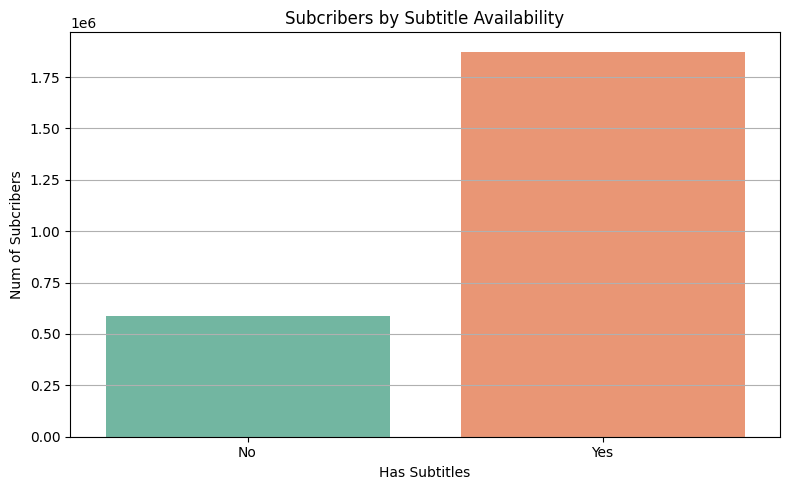

In [ ]:
# Create a bar chart to compare average likes between videos with and without subtitles
plt.figure(figsize=(8, 5))
avg_likes = df.groupby('has_subtitles')['subscriber_count'].mean().reset_index()

sns.barplot(
    data=avg_likes,
    x='has_subtitles',
    y='subscriber_count',
    palette='Set2'
)

plt.title("Subcribers by Subtitle Availability")
plt.xlabel("Has Subtitles")
plt.ylabel("Num of Subcribers")
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

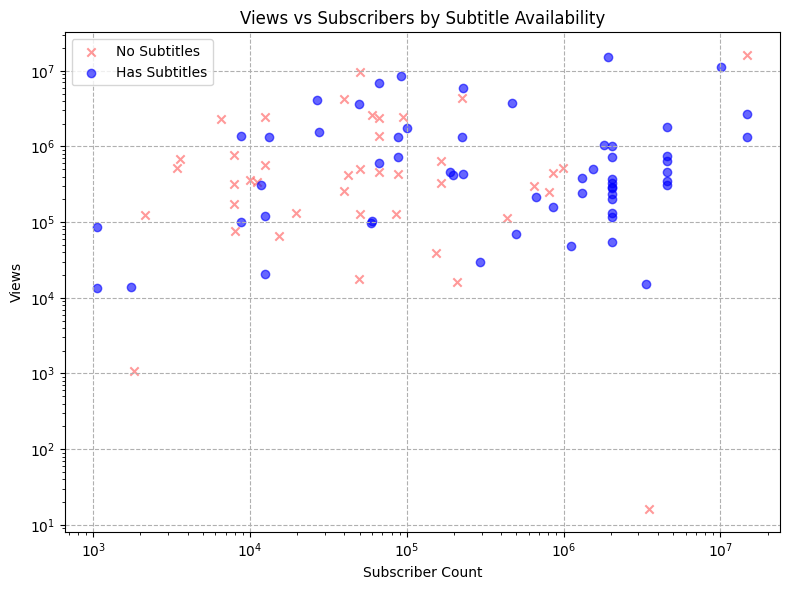

In [ ]:
# Identify which column flags subtitles
subtitle_col = 'has_subtitles' if 'has_subtitles' in df.columns else 'has_subtitle'

# Split into two subsets
no_subs = df[df[subtitle_col] == False]
with_subs = df[df[subtitle_col] == True]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(no_subs['subscriber_count'], no_subs['views'],
            marker='x', alpha=0.4, label='No Subtitles', color = "red")
plt.scatter(with_subs['subscriber_count'], with_subs['views'],
            marker='o', alpha=0.6, label='Has Subtitles', color = 'blue')

# (Optional) Log scales if your data spans many orders:
plt.xscale('log')
plt.yscale('log')

# Labels, title, legend
plt.xlabel('Subscriber Count')
plt.ylabel('Views')
plt.title('Views vs Subscribers by Subtitle Availability')
plt.legend()
plt.grid(True, ls='--')

# Show it
plt.tight_layout()
plt.show()